--------------
## Comentario
Van a encontrar los comentarios que les hacemos con este formato.
Tengan en cuenta que sólo vamos a remarcarles con recomendaciones el código. Donde no haya comentarios, es porque está bien.

--------------
<h1>Desafio 1 - Grupo 5</h1>

<h3><u>Intregrantes del grupo</u></h3>

- Lesertesseur, Diego
- Panizza, Camila  
- Pellecchia, Franco   
- Magariños, Néstor  
- Suarez, Horacio  

<h3><u>Objetivos</u></h3>
La inmobiliaria Properati publica periódicamente información sobre ofertas de propiedades
para venta y alquiler. Ud. deberá asesorar a la inmobiliaria a desarrollar un modelo de
regresión que permita predecir el precio por metro cuadrado de una propiedad. El objetivo
final es que el modelo que desarrollen sea utilizado como tasador automático a ser
aplicados a las próximas propiedades que sean comercializadas por la empresa. Para ello
la empresa le provee de un dataset correspondiente al primer semestre de 2017.

- Efectuar una limpieza del dataset provisto. Particularmente, deberá diseñar estrategias para lidiar con los datos perdidos en ciertas variables.
- Realizar un análisis descriptivo de las principales variables.
- Crear nuevas columnas a partir de las características dadas que puedan tener valor
predictivo.

<h3><u>Variables</u></h3>

- Fecha de creación
- Tipo de la propiedad (house, apartment, ph)
- Operación del aviso (sell, rent)
- Nombre del lugar
- Nombre del lugar + nombre de sus ‘padres’
- ID de geonames del lugar (si está disponible)
- Latitud,Longitud
- Precio original del aviso
- Moneda original del aviso (ARS, USD)
- Precio del aviso en moneda local (ARS)
- Precio aproximado en USD
- Superficie en m²
- Superficie cubierta en m²
- Precio en USD/m²
- Precio por m²
- N° de piso, si corresponde
- Ambientes
- URL en Properati
- Descripción
- Título
- URL de un thumbnail de la

<h3><u>Índice</u></h3>
<a href='#section_1'>1. Preparación del dataset</a> 

<a href='#section_2'>2. Data wrangling</a>  
<a href='#section_3'>3. Nuevas variables</a>  
<a href='#section_4'>4. Dataset final</a>

---
---
<b><a id='section_1'><h4>1. Preparación del dataset</h4></a></b>
<a href='#section_1_1'>1.1. Importación de librerías y carga del dataset</a>  
<a href='#section_1_2'>1.2. Descripción del dataset</a>  
<a href='#section_1_3'>1.3. Selección de columnas útiles</a>

<b><a id='section_1_1'>1.1. Importación de librerías y carga del dataset</a>  </b>

In [2]:
import numpy as np
import pandas as pd
import re 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [3]:
data= pd.read_csv("../Data/properati.csv")

---
<b><a id='section_1_2'>1.2. Descripción del dataset</a></b>

In [4]:
data_describe = pd.DataFrame(round(data.isnull().sum() /data.shape[0],2), columns= ['Porcentaje de nulos'])
data_describe['type'] = data.dtypes
data_describe = data_describe[['type','Porcentaje de nulos']]
data_describe['Nulos'] = data.isnull().sum()
values= []
example=[]
for x in data:
    values.append(len(data[x].unique()))
    example.append(data[x].unique())
data_describe['Valores distintos'] = values
data_describe['Ejemplos'] = example

data_describe

,type,Porcentaje de nulos,Nulos,Valores distintos,Ejemplos
Unnamed: 0,int64,0.00,0,121220,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
operation,object,0.00,0,1,[sell]
property_type,object,0.00,0,4,"[PH, apartment, house, store]"
place_name,object,0.00,23,1061,"[Mataderos, La Plata, Liniers, Centro, Gualegu..."
place_with_parent_names,object,0.00,0,1164,"[|Argentina|Capital Federal|Mataderos|, |Argen..."
country_name,object,0.00,0,1,[Argentina]
state_name,object,0.00,0,28,"[Capital Federal, Bs.As. G.B.A. Zona Sur, Buen..."
geonames_id,float64,0.15,18717,647,"[3430787.0, 3432039.0, 3431333.0, 3435548.0, 3..."
lat-lon,object,0.43,51550,47204,"[-34.6618237,-58.5088387, -34.9038831,-57.9643..."
lat,float64,0.43,51550,46496,"[-34.6618237, -34.9038831, -34.6522615, -34.64..."


---
<b><a id='section_1_3'>1.3. Selección de columnas útiles</a></b>

In [5]:
columnasUtiles=   ['property_type','place_name','state_name', 'place_with_parent_names', 'price', 'currency','price_aprox_local_currency',
                   'price_aprox_usd','surface_total_in_m2','surface_covered_in_m2','price_usd_per_m2',
                   'rooms', 'expenses','description','title']
data_describe_utiles = data_describe.loc[columnasUtiles,:]
data_describe_utiles

,type,Porcentaje de nulos,Nulos,Valores distintos,Ejemplos
property_type,object,0.00,0,4,"[PH, apartment, house, store]"
place_name,object,0.00,23,1061,"[Mataderos, La Plata, Liniers, Centro, Gualegu..."
state_name,object,0.00,0,28,"[Capital Federal, Bs.As. G.B.A. Zona Sur, Buen..."
place_with_parent_names,object,0.00,0,1164,"[|Argentina|Capital Federal|Mataderos|, |Argen..."
price,float64,0.17,20410,9747,"[62000.0, 150000.0, 72000.0, 95000.0, 64000.0,..."
currency,object,0.17,20411,5,"[USD, nan, ARS, PEN, UYU]"
price_aprox_local_currency,float64,0.17,20410,10365,"[1093959.0, 2646675.0, 1270404.0, 1676227.5, 1..."
price_aprox_usd,float64,0.17,20410,10365,"[62000.0, 150000.0, 72000.0, 95000.0, 64000.0,..."
surface_total_in_m2,float64,0.32,39328,1688,"[55.0, nan, 35.0, 53.0, 106.0, 45.0, 65.0, 151..."
surface_covered_in_m2,float64,0.16,19907,996,"[40.0, nan, 55.0, 35.0, 78.0, 60.0, 36.0, 30.0..."


---
---

<b><a id='section_2'><h4>2. Data wrangling</h4></a></b>
<a href='#section_2_1'>2.1. Columna 'property_type'</a>  
<a href='#section_2_2'>2.2. Columnas 'country_name', 'state_name', 'place_name' y'place_with_parent_names'</a>  
<a href='#section_2_3'>2.3. Columnas 'price','currency','price_aprox_local_currency' y 'price_aprox_usd' </a>  
<a href='#section_2_4'>2.4. Columna 'rooms'</a>  
<a href='#section_2_5'>2.5. Columna 'floor'</a>  
<a href='#section_2_6'>2.6. Columnas 'surface_total_in_m2' y 'surface_covered_in_m2'</a>  
<a href='#section_2_7'>2.7. Columna 'price_usd_per_m2'</a>  

In [6]:
data['description_lower'] = data['description'].str.lower()
data['title_lower'] = data['title'].str.lower()

<b><a id='section_2_1'>2.1. Columna 'property_type'</a></b>

Análisis de valores y nulos

In [7]:
data_describe.loc[data_describe.index.isin(['property_type']),:]

,type,Porcentaje de nulos,Nulos,Valores distintos,Ejemplos
property_type,object,0.0,0,4,"[PH, apartment, house, store]"


Visualización

--------------
## Comentario
Si bien está perfecta la premisa de mostrar la relación de la frecuencia de observaciones según tipo, en general no es recomendado usar gráficos de torta. Les dejo una nota al respecto <a href="https://www.geckoboard.com/blog/pie-charts/#:~:text=The%20basic%20premise%20is%20that,reading%20accurate%20values%20is%20difficult.">acá</a>. Fuera de eso, está bien construido.

Recomiendo mostrar un `barplot` con una barra para cada tipo, o una única barra con los datos apilados por color representando cada tipo de inmueble.
Otra buena visualización para este caso, es usar un `distplot` de tipo _kernel density_ diferenciando cada población con un color, pero está bien que no lo hayan utilizado porque en este momento los datos tienen outliers.

--------------

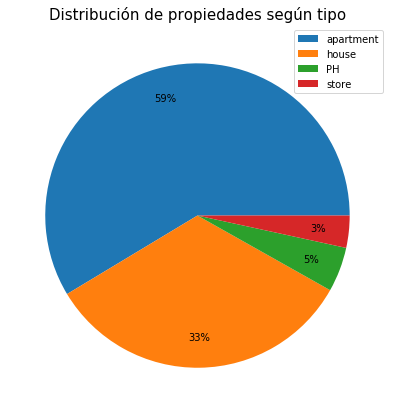

In [8]:
f, ax = plt.subplots()
f.set_figwidth(7)
f.set_figheight(7)
plt.pie(data['property_type'].value_counts(), autopct='%1.0f%%', pctdistance=0.8)
plt.title("Distribución de propiedades según tipo",fontsize=15)
plt.legend(labels=data['property_type'].value_counts().index)
print()

---
<b><a id='section_2_1'>2.2. Columnas 'country_name', 'state_name', 'place_name' y'place_with_parent_names'</a></b>

Análisis de valores y nulos

In [9]:
data_describe.loc[data_describe.index.isin(['country_name', 'state_name', 'place_name','place_with_parent_names']),:]

,type,Porcentaje de nulos,Nulos,Valores distintos,Ejemplos
place_name,object,0.0,23,1061,"[Mataderos, La Plata, Liniers, Centro, Gualegu..."
place_with_parent_names,object,0.0,0,1164,"[|Argentina|Capital Federal|Mataderos|, |Argen..."
country_name,object,0.0,0,1,[Argentina]
state_name,object,0.0,0,28,"[Capital Federal, Bs.As. G.B.A. Zona Sur, Buen..."


Dividimos la columna 'place_with_parent_names' y analizamos su contenido.


--------------
## Comentario

Los loops de python son mucho más lentos que las operaciones vectorizadas de pandas o numpy, ya que estas se ejecutan directamente en C (o C++, no recuerdo). Por otra parte, trante de ser lo más expresivos posibles en los nombres de las funciones o de las variables. Por ejemplo, no entiendo por que hay un `-2` en la línea `total_place = data['place_with_parent_names_clean'].apply(lambda x: len(x.split('|'))-2)`.

El resultado final está bien, pero les recomiendo ejecutar:
```python
data['place_with_parent_names_clean'] = data['place_with_parent_names']

clean_place = data['place_with_parent_names_clean'].apply(lambda row: row.split('|'))   # esto devuelve una serie con listas dentro de cada row.

clean_place = clean_place.apply(pd.Series)  # esto devuelve un dataframe con la cantidad de columnas necesarias.

clean_place.columns = ['nombre', 'representativo', 'de', 'valores', 'en', 'columnas'] 

# alternativamente pueden hacer algo como:
clean_place.columns = [f'place{i}' for i, value in enumerate(clean_place.columns)]

data = data.join(clean_place)

```

--------------

In [10]:
data['place_with_parent_names_clean'] = data['place_with_parent_names']

total_place = data['place_with_parent_names_clean'].apply(lambda x: len(x.split('|'))-2)
dic_ret = dict()
for i in range(total_place.max()):
    dic_ret['place_'+ str(i)] = ([None] * total_place.shape[0])

In [11]:
for row in data['place_with_parent_names_clean'].index:
    i=0;
    list_places = data['place_with_parent_names_clean'].loc[row].split('|')
    for x in list_places:
        if len(x)>0:
            colname='place_' + str(i)
            dic_ret[colname][row] = x
            i+=1

In [12]:
new_columns = pd.DataFrame(dic_ret)
data = data.join(new_columns)

In [13]:
data[['country_name','state_name','place_name','place_0','place_1','place_2','place_3','place_4']].sample(10)

,country_name,state_name,place_name,place_0,place_1,place_2,place_3,place_4
17212,Argentina,Buenos Aires Costa Atlántica,San Bernardo,Argentina,Buenos Aires Costa Atlántica,San Bernardo,None,None
72201,Argentina,Capital Federal,Villa Real,Argentina,Capital Federal,Villa Real,None,None
37431,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,None,None
105599,Argentina,Santa Fe,Rosario,Argentina,Santa Fe,Rosario,None,None
16641,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,None,None
87031,Argentina,Capital Federal,Palermo Hollywood,Argentina,Capital Federal,Palermo,Palermo Hollywood,None
45871,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,None,None
6607,Argentina,Capital Federal,Belgrano,Argentina,Capital Federal,Belgrano,None,None
57499,Argentina,Capital Federal,Villa Urquiza,Argentina,Capital Federal,Villa Urquiza,None,None
19512,Argentina,Bs.As. G.B.A. Zona Oeste,Sáenz Peña,Argentina,Bs.As. G.B.A. Zona Oeste,Tres de Febrero,Sáenz Peña,None


La columna place_with_parent_names contiene la misma información que las columnas 'country_name', 'state_name' y 'place_name' e incluye información adicional.  
Se opta por utilizar la información proveniente de 'place_with_parent_name' y <u>se generan las variables 'provincia','ciudad','departamento' y'barrio'</u>

In [14]:
data[['provincia','ciudad','departamento','barrio']] = data[['place_1','place_2','place_3','place_4']]

Visualización

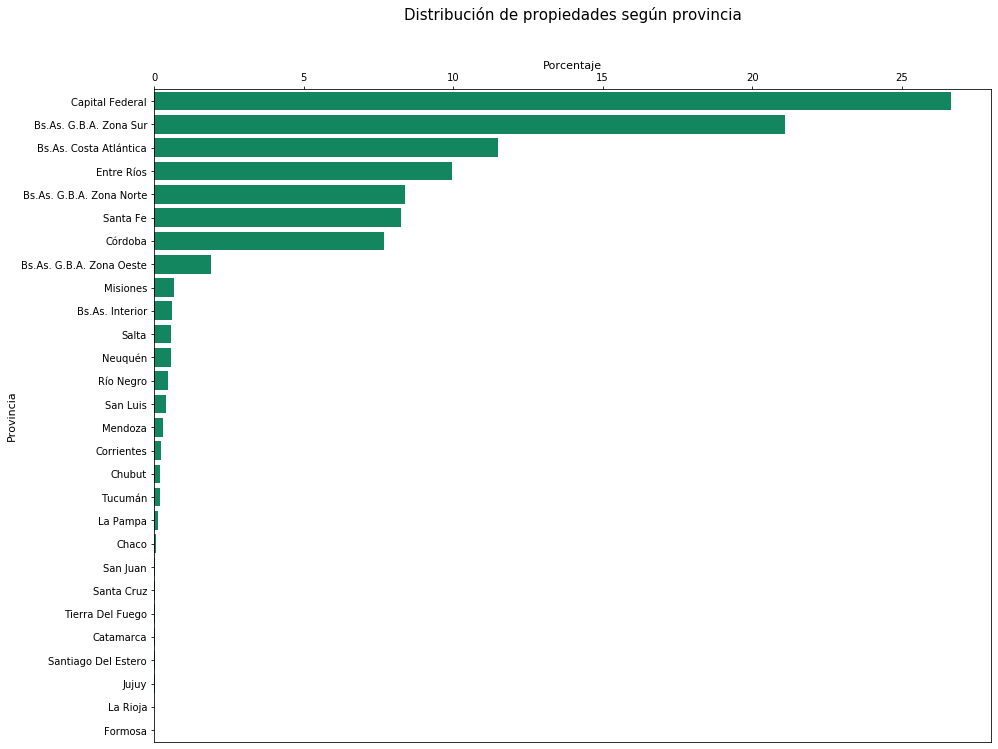

In [15]:
patternBsAs = re.compile("Buenos Aires\s*")
data['provincia'] = data['provincia'].apply(lambda x: patternBsAs.sub('Bs.As. ', x))

f, ax = plt.subplots()
f.set_figwidth(15)
f.set_figheight(12)
sns.barplot((data['provincia'].value_counts()/data['provincia'].shape[0])*100,data['provincia'].unique(), ax=ax , color = "#009966", orient="h")
plt.title("Distribución de propiedades según provincia\n\n",fontsize=15)
plt.xlabel("Porcentaje",fontsize=11)
ax.xaxis.set_label_position('top') 
plt.ylabel("Provincia",fontsize=11)
ax.xaxis.tick_top()

---
<b><a id='section_2_3'>2.3. Columnas 'price','currency','price_aprox_local_currency' y 'price_aprox_usd' </a>  </b>

Análisis de valores y nulos

In [16]:
data_describe.loc[data_describe.index.isin(['price','currency','price_aprox_local_currency','price_aprox_usd']),:]

,type,Porcentaje de nulos,Nulos,Valores distintos,Ejemplos
price,float64,0.17,20410,9747,"[62000.0, 150000.0, 72000.0, 95000.0, 64000.0,..."
currency,object,0.17,20411,5,"[USD, nan, ARS, PEN, UYU]"
price_aprox_local_currency,float64,0.17,20410,10365,"[1093959.0, 2646675.0, 1270404.0, 1676227.5, 1..."
price_aprox_usd,float64,0.17,20410,10365,"[62000.0, 150000.0, 72000.0, 95000.0, 64000.0,..."


--------------
## Comentario
La máscara está perfecta, pero esto es simplemente una cuestión de legibilidad:
Cuando utilizan varias condiciones booleanas, no está de más generar variables para cada una para no tener líneas tan largas. Pueden encontrar cuestiones de formateo estándar en PEP 8. Lo mismo con utilziar lowerCamelCase (es sólo una costumbre de python no usarla, como sí lo es de javascript).

In [17]:
maskNull_priceAndCurrency = data['price'].isnull() & data['currency'].isnull() & data['price_aprox_local_currency'].isnull() & data['price_aprox_usd'].isnull()

print("Cantidad de nulos que coinciden:",maskNull_priceAndCurrency.value_counts()[True],"de 20411")

Cantidad de nulos que coinciden: 20410 de 20411


In [18]:
data.loc[data['currency'].isnull() & data['price'].notnull() ,['price','currency','price_aprox_local_currency','price_aprox_usd']]

,price,currency,price_aprox_local_currency,price_aprox_usd
9761,0.0,NaN,0.0,0.0


Detectamos que <u>los nulos de las columnas  'price','currency','price_aprox_local_currency' y 'price_aprox_usd' coinciden</u>  
Existe un solo nulo adicional en la columna 'currency' en el cual el resto toma valor 0. Se decide reemplazar esos 0 por NaN

In [19]:
data[['price_clean', 'price_aprox_local_currency_clean','price_aprox_usd_clean']]=data[['price','price_aprox_local_currency','price_aprox_usd']]

In [20]:
data.loc[data['currency'].isnull(),['price_clean', 'price_aprox_local_currency_clean','price_aprox_usd_clean']] = np.NaN
data.loc[9761,['price_clean', 'currency', 'price_aprox_local_currency_clean','price_aprox_usd_clean']]

price_clean                         NaN
currency                            NaN
price_aprox_local_currency_clean    NaN
price_aprox_usd_clean               NaN
Name: 9761, dtype: object

Para la propiedades que tienen 'price' expresado en USD, imputamos estos valores en la columna 'price_aprox_usd_clean'

In [21]:
maskUSD = data['currency'] == "USD"
data.loc[maskUSD, 'price_aprox_usd_clean'] = data.loc[maskUSD, 'price']

Visualización

Text(0, 0.5, 'Porcentaje')

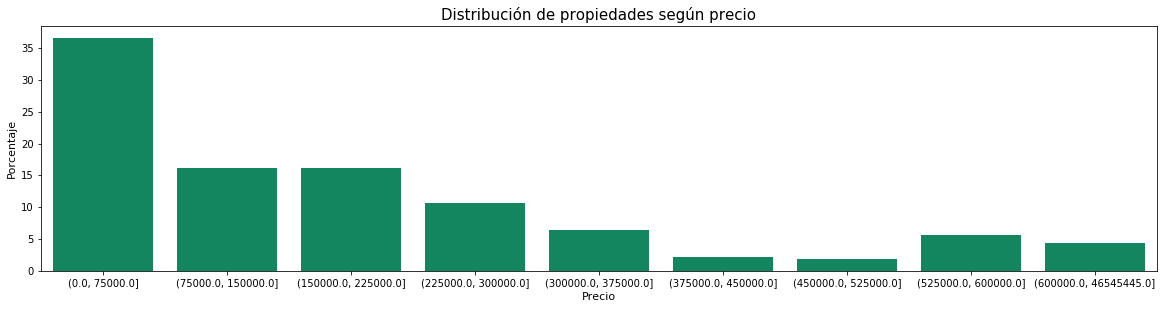

In [22]:
maskNotNull_price= data['price_aprox_usd_clean'].notnull()
precioMaximo=data['price_aprox_usd_clean'].max()
bins= [0,75000,150000,225000,300000,375000,450000, 525000, 600000, precioMaximo]

dist = pd.cut(data.loc[maskNotNull_price, 'price_aprox_usd_clean'], bins) 

f, ax = plt.subplots()
f.set_figwidth(20)
f.set_figheight(4.5)
sns.barplot(dist.unique(),(dist.value_counts()/data.loc[maskNotNull_price, 'price_aprox_usd_clean'].shape[0])*100,ax=ax , color = "#009966")
plt.title("Distribución de propiedades según precio",fontsize=15)
plt.xlabel("Precio",fontsize=11)
plt.ylabel("Porcentaje",fontsize=11)

Análisis de outliers.   
  
Debido a la diferencias que pueden existir entre el tipo de propiedad, se calculan valores límites para determinar outliers según tipo de propiedad. Esta consideración es tenida en cuenta en todos los procesos de "Análisis de outliers"

In [23]:
data['outliers_price'] = None
for i in data['property_type'].unique():
    rangoInterquartil_price= data.loc[data['property_type']==i,'price_aprox_usd_clean'].quantile(0.75) - data.loc[data['property_type']==i,'price_aprox_usd_clean'].quantile(0.25)
    umbral_lower_price = data.loc[data['property_type']==i,'price_aprox_usd_clean'].quantile(0.25) - rangoInterquartil_price*1.5
    umbral_upper_price = data.loc[data['property_type']==i,'price_aprox_usd_clean'].quantile(0.75) + rangoInterquartil_price*1.5


    data.loc[maskNotNull_price & (data['property_type']==i), 'outliers_price']= data.loc[maskNotNull_price & (data['property_type']==i), 'price_aprox_usd_clean'].apply\
                                                                                    (lambda x: "Outlier superior" if x >umbral_upper_price else(
                                                                                 "Outlier inferior" if x<umbral_lower_price else 
                                                                                 "No es outlier"))

outliers_price = data['outliers_price']
data = data.drop(columns = ['outliers_price'])
pd.DataFrame(round((outliers_price.value_counts() / outliers_price[maskNotNull_price].shape[0])*100,1))

,outliers_price
No es outlier,91.5
Outlier superior,8.5


--------------
## Comentario
Buen ojo en fijarse de quitar outliers por tipo de inmueble. Para el desafío, pueden incluir también alguna variable de ubicación como condición para hacerlo. Eso sí, si desean hacerlo, les aviso que va a ser un loop largo.
Tengan en cuenta que pueden ir eliminando outliers por separado también. Por ejemplo, si eliminan precios sin evaluar el tipo de inmuebe ni el barrio, pueden eliminar los outliers de Catamarca y San Juan, ya que los valores que tienen esas provincias son ridículos. Después pueden entrar en detalle e ir eliminando con distintos criterios.

--------------

Solo existen outliers en la cola superior de la distribución. Se reemplaza a los outliers por nulos

In [24]:
maskOutliers= outliers_price !="No es outlier"
data.loc[maskOutliers,'price_aprox_usd_clean'] = np.NaN

Visualización sin outliers

Text(0, 0.5, 'Porcentaje')

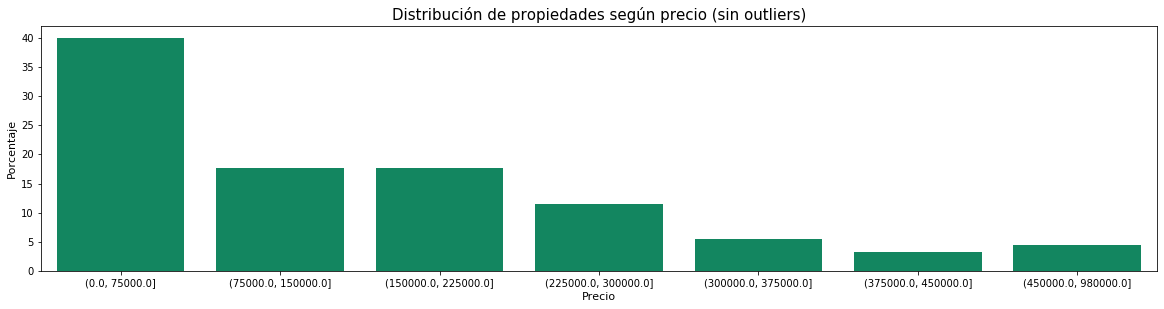

In [25]:
maskNotNull_price= data['price_aprox_usd_clean'].notnull()
precioMaximo=data['price_aprox_usd_clean'].max()
bins= [0,75000,150000,225000,300000,375000,450000, precioMaximo]

dist = pd.cut(data.loc[maskNotNull_price, 'price_aprox_usd_clean'], bins) 

f, ax = plt.subplots()
f.set_figwidth(20)
f.set_figheight(4.5)
sns.barplot(dist.unique(),(dist.value_counts()/data.loc[maskNotNull_price, 'price_aprox_usd_clean'].shape[0])*100,ax=ax , color = "#009966")
plt.title("Distribución de propiedades según precio (sin outliers)",fontsize=15)
plt.xlabel("Precio",fontsize=11)
plt.ylabel("Porcentaje",fontsize=11)

Text(0, 0.5, 'Precio')

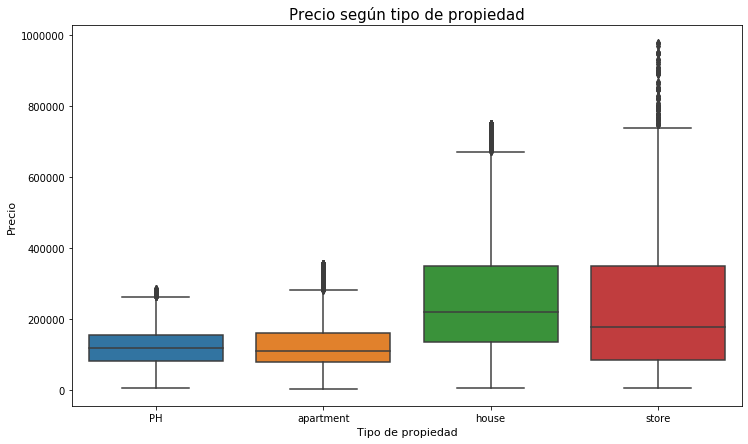

In [26]:
maskNotNull_Rooms = data['price_aprox_usd_clean'].notnull()
f, ax = plt.subplots()
f.set_figwidth(12)
f.set_figheight(7)
sns.boxplot(x=data.loc[maskNotNull_Rooms,'property_type'],y=data.loc[maskNotNull_Rooms,'price_aprox_usd_clean'])
plt.title("Precio según tipo de propiedad",fontsize=15)
plt.xlabel("Tipo de propiedad",fontsize=11)
plt.ylabel("Precio",fontsize=11)

---
<b><a id='section_2_4'>2.4. Columna 'rooms'</a>  </b>

In [27]:
data['rooms_clean'] = data['rooms']

Análisis de nulos y valores

In [28]:
data_describe.loc[data_describe.index.isin(['rooms']),:]

,type,Porcentaje de nulos,Nulos,Valores distintos,Ejemplos
rooms,float64,0.61,73830,32,"[nan, 1.0, 4.0, 3.0, 2.0, 6.0, 5.0, 10.0, 7.0,..."


Completamos los nulos de la columna 'rooms' con datos extraidos de la columna 'descripcion' y 'title'

In [29]:
#Primer pattern
regexAmbientes = re.compile('(?P<numero>\d{1})\s?(amb)')

#Regex en la columna 'descripcion'
MatchsAmbientes = data['description_lower'].apply(lambda x: x if x is np.NaN else regexAmbientes.search(x))
maskRooms_NullsAndMatch = data['rooms'].isnull() & MatchsAmbientes.notnull()
data.loc[maskRooms_NullsAndMatch, 'rooms_clean'] = MatchsAmbientes[maskRooms_NullsAndMatch].apply(lambda x: float(x.group("numero")))
#Regex en la columna 'title'
MatchsAmbientes = data['title_lower'].apply(lambda x: x if x is np.NaN else regexAmbientes.search(x))
maskRooms_NullsAndMatch = data['rooms_clean'].isnull() & MatchsAmbientes.notnull()
data.loc[maskRooms_NullsAndMatch, 'rooms_clean'] = MatchsAmbientes[maskRooms_NullsAndMatch].apply(lambda x: float(x.group("numero")))

In [30]:
#Segundo pattern
regexAmbientes2 = re.compile('(?P<numeroPalabra>uno|un|dos|tres|cuatro|cinco|seis|siete|ocho)\s?(amb)')

#Definimos una función para transformar el match obtenido en el search en un número
def MatchToNumber(x):
    numeroStr = x.group("numeroPalabra")
    dictAmbientes = {'un': 1, 'uno':1,'dos':2, 'tres':3, 'cuatro':4, 'cinco': 5, 'seis': 6, 'seís':6, 'siete': 7, 'ocho': 8}
    resultado = dictAmbientes[numeroStr]
    return resultado

#Regex en la columna 'descripcion'
MatchsAmbientes = data['description_lower'].apply(lambda x: x if x is np.NaN else regexAmbientes2.search(x))
maskRooms_NullsAndMatch = data['rooms_clean'].isnull() & MatchsAmbientes.notnull()
data.loc[maskRooms_NullsAndMatch, 'rooms_clean'] = MatchsAmbientes[maskRooms_NullsAndMatch].apply(MatchToNumber)

#Regex en la columna 'title'
MatchsAmbientes = data['title_lower'].apply(lambda x: x if x is np.NaN else regexAmbientes2.search(x))
maskRooms_NullsAndMatch = data['rooms_clean'].isnull() & MatchsAmbientes.notnull()
data.loc[maskRooms_NullsAndMatch, 'rooms_clean'] = MatchsAmbientes[maskRooms_NullsAndMatch].apply(MatchToNumber)

In [31]:
#Tercer pattern
regexAmbientes3 = re.compile('(?P<numero>\d{1})\s?(dorm|cuarto|hab)')
#Debido a que este Pattern considera únicamente dormitorios/habitaciones, se le agrega 1 habitación a todos los matchs

#Regex en la columna 'descripcion'
MatchsAmbientes = data['description_lower'].apply(lambda x: x if x is np.NaN else regexAmbientes3.search(x))
maskRooms_NullsAndMatch = data['rooms'].isnull() & MatchsAmbientes.notnull()
data.loc[maskRooms_NullsAndMatch, 'rooms_clean'] = MatchsAmbientes[maskRooms_NullsAndMatch].apply(lambda x: float(x.group("numero"))+1)
#Regex en la columna 'title'
MatchsAmbientes = data['title_lower'].apply(lambda x: x if x is np.NaN else regexAmbientes3.search(x))
maskRooms_NullsAndMatch = data['rooms_clean'].isnull() & MatchsAmbientes.notnull()
data.loc[maskRooms_NullsAndMatch, 'rooms_clean'] = MatchsAmbientes[maskRooms_NullsAndMatch].apply(lambda x: float(x.group("numero"))+1)


In [32]:
#Cuarto pattern
regexAmbientes4 = re.compile('(?P<numeroPalabra>un|1|mono)\s?(amb)')

#Regex en la columna 'descripcion'
MatchsAmbientes = data['description_lower'].apply(lambda x: x if x is np.NaN else regexAmbientes4.search(x))
maskRooms_NullsAndMatch = data['rooms_clean'].isnull() & MatchsAmbientes.notnull()
data.loc[maskRooms_NullsAndMatch, 'rooms_clean'] = MatchsAmbientes[maskRooms_NullsAndMatch].apply(lambda x: float(1.0))

#Regex en la columna 'title'
MatchsAmbientes = data['title_lower'].apply(lambda x: x if x is np.NaN else regexAmbientes4.search(x))
maskRooms_NullsAndMatch = data['rooms_clean'].isnull() & MatchsAmbientes.notnull()
data.loc[maskRooms_NullsAndMatch, 'rooms_clean'] = MatchsAmbientes[maskRooms_NullsAndMatch].apply(lambda x: float(1.0))

In [33]:
#Quinto pattern
regexAmbientes5 = re.compile('(?P<numeroPalabra>un|dos|tres|cuatro|cinco|seis|siete|ocho)\s?(dorm|cuarto|hab)')
#Debido a que este Pattern considera únicamente dormitorios/habitaciones, se le agrega 1 habitación a todos los matchs

#Regex en la columna 'descripcion'
MatchsAmbientes = data['description_lower'].apply(lambda x: x if x is np.NaN else regexAmbientes5.search(x))
maskRooms_NullsAndMatch = data['rooms_clean'].isnull() & MatchsAmbientes.notnull()
data.loc[maskRooms_NullsAndMatch, 'rooms_clean'] = MatchsAmbientes[maskRooms_NullsAndMatch].apply(lambda x: MatchToNumber(x)+1)

#Regex en la columna 'title'
MatchsAmbientes = data['title_lower'].apply(lambda x: x if x is np.NaN else regexAmbientes5.search(x))
maskRooms_NullsAndMatch = data['rooms_clean'].isnull() & MatchsAmbientes.notnull()
data.loc[maskRooms_NullsAndMatch, 'rooms_clean'] = MatchsAmbientes[maskRooms_NullsAndMatch].apply(lambda x: MatchToNumber(x)+1)

In [34]:
print("Columna 'rooms'")
print("Cantidad de nulos antes del regex:", data['rooms'].isnull().sum(), "("+str(round((data['rooms'].isnull().sum()/data.shape[0])*100,1))+"%)")
print("Cantidad de nulos después del regex:", data['rooms_clean'].isnull().sum(),"("+str(round((data['rooms_clean'].isnull().sum()/data.shape[0])*100,1))+"%)")

Columna 'rooms'
Cantidad de nulos antes del regex: 73830 (60.9%)
Cantidad de nulos después del regex: 15717 (13.0%)


Visualización

Text(0, 0.5, 'Cuartos')

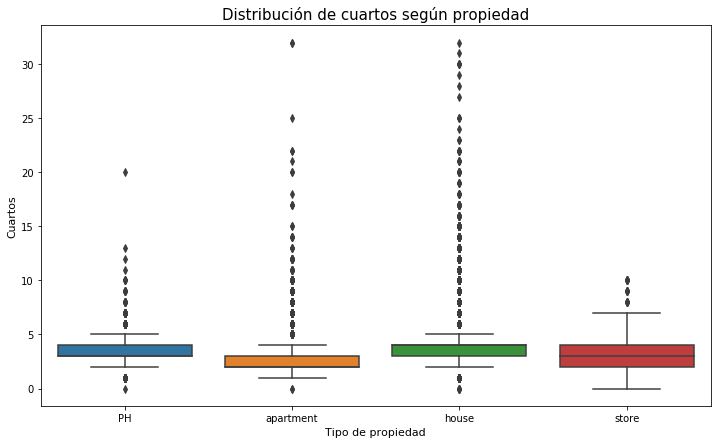

In [35]:
maskNotNull_Rooms = data['rooms_clean'].notnull()
f, ax = plt.subplots()
f.set_figwidth(12)
f.set_figheight(7)
sns.boxplot(x=data.loc[maskNotNull_Rooms,'property_type'],y=data.loc[maskNotNull_Rooms,'rooms_clean'])
plt.title("Distribución de cuartos según propiedad",fontsize=15)
plt.xlabel("Tipo de propiedad",fontsize=11)
plt.ylabel("Cuartos",fontsize=11)

Análisis de outliers

In [36]:
data['outliers_rooms'] = None
for i in data['property_type'].unique():
    rangoInterquartil_rooms= data.loc[data['property_type']==i,'rooms_clean'].quantile(0.75) - data.loc[data['property_type']==i,'rooms_clean'].quantile(0.25)
    umbral_lower_rooms = data.loc[data['property_type']==i,'rooms_clean'].quantile(0.25) - rangoInterquartil_rooms*1.5
    umbral_upper_rooms = data.loc[data['property_type']==i,'rooms_clean'].quantile(0.75) + rangoInterquartil_rooms*1.5


    data.loc[maskNotNull_Rooms & (data['property_type']==i), 'outliers_rooms']= data.loc[maskNotNull_Rooms & (data['property_type']==i), 'rooms_clean'].apply\
                                                                                    (lambda x: "Outlier superior" if x >umbral_upper_rooms else(
                                                                                 "Outlier inferior" if x<umbral_lower_rooms else 
                                                                                 "No es outlier"))

outliers_rooms = data['outliers_rooms']
data = data.drop(columns = ['outliers_rooms'])
pd.DataFrame(round((outliers_rooms.value_counts() / outliers_rooms[maskNotNull_Rooms].shape[0])*100,1))

,outliers_rooms
No es outlier,94.0
Outlier superior,5.4
Outlier inferior,0.6


Se reemplaza a los outliers por nulos

In [37]:
maskOutliers= outliers_rooms !="No es outlier"
data.loc[maskOutliers,'rooms_clean'] = np.NaN

Le imputamos a los datos que los nulos el valor promedio de cuartos según su tipo de propiedad.
Los nulos proveniente de los outliers quedan nulos

In [38]:
maskOldNulls = maskNotNull_Rooms ==False 

In [39]:
meanByProperty_rooms = pd.DataFrame(data.groupby('property_type')['rooms_clean'].mean())
meanByProperty_rooms.columns = ['rooms_clean_mean']
meanByProperty_rooms['rooms_clean_mean'] = meanByProperty_rooms['rooms_clean_mean'].apply(lambda x: math.floor(x))
meanByProperty_rooms.sort_values(by = 'rooms_clean_mean', ascending=False)

,rooms_clean_mean
property_type,
PH,3
house,3
apartment,2
store,2


In [40]:
data= data.merge(meanByProperty_rooms, on='property_type')

In [41]:
data.loc[maskOldNulls,'rooms_clean'] = data.loc[maskOldNulls,'rooms_clean_mean'] 
data = data.drop(columns=['rooms_clean_mean'])

Visualización sin outliers

Text(0, 0.5, 'Cuartos')

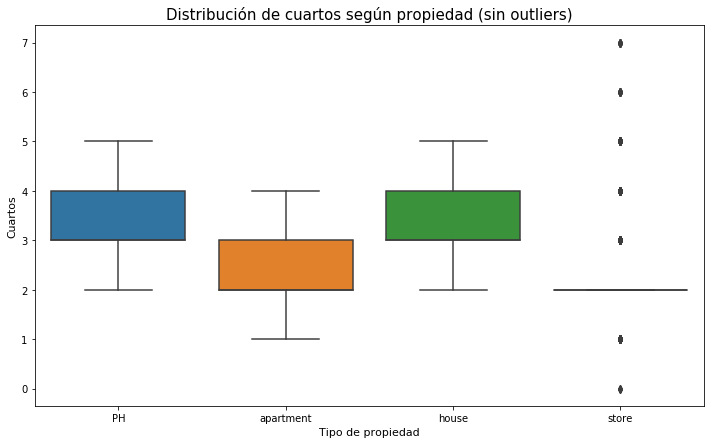

In [42]:
f, ax = plt.subplots()
f.set_figwidth(12)
f.set_figheight(7)
sns.boxplot(x=data['property_type'],y=data['rooms_clean'])
plt.title("Distribución de cuartos según propiedad (sin outliers)",fontsize=15)
plt.xlabel("Tipo de propiedad",fontsize=11)
plt.ylabel("Cuartos",fontsize=11)

---
<b><a id='section_2_5'>2.5. Columna 'floor'</a> </b>

In [43]:
data['floor_clean'] = data['floor']

Análisis de nulos y valores

In [44]:
data_describe.loc[data_describe.index.isin(['floor']),:]

,type,Porcentaje de nulos,Nulos,Valores distintos,Ejemplos
floor,float64,0.93,113321,183,"[nan, 5.0, 1.0, 2.0, 3.0, 12.0, 6.0, 4.0, 7.0,..."


In [45]:
print("Campos con información en la columna 'floor' según tipo de propiedad")
pd.DataFrame(data.groupby('property_type')['floor'].apply(lambda x: x.notnull().sum()))

Campos con información en la columna 'floor' según tipo de propiedad


,floor
property_type,
PH,573
apartment,6521
house,765
store,40


Se decide contemplar la variable 'floor' únicamente para los departamentos. Se le imputa valor nulo a los otros tipo de propiedad

In [46]:
maskNotApartment = data['property_type'] != 'apartment'
data.loc[maskNotApartment, 'floor_clean'] = np.NaN
pd.DataFrame(data.groupby('property_type')['floor_clean'].apply(lambda x: x.notnull().sum()))

,floor_clean
property_type,
PH,0
apartment,6521
house,0
store,0


Completamos los nulos de la columna 'floor_clean' con datos extraidos de la columna 'descripcion' y 'title'

In [47]:
maskApartment = data['property_type'] == 'apartment'

In [48]:
#Primer pattern
regexFloor = re.compile('(?P<numeroPiso>\d\d?)\s?(^er|er|do|to|mo|ro|avo|vo|no)')

#Regex en la columna 'descripcion'
MatchsFloor = data['description_lower'].apply(lambda x: x if x is np.NaN else regexFloor.search(x))
maskFloor_NullsAndMatch = data['floor_clean'].isnull() & MatchsFloor.notnull()
data.loc[maskFloor_NullsAndMatch, 'floor_clean'] = MatchsFloor[maskFloor_NullsAndMatch].apply(lambda x: float(x.group("numeroPiso")))

#Regex en la columna 'title'
MatchsFloor = data['title_lower'].apply(lambda x: x if x is np.NaN else regexFloor.search(x))
maskFloor_NullsAndMatch = data['floor_clean'].isnull() & MatchsFloor.notnull()
data.loc[maskFloor_NullsAndMatch, 'floor_clean'] = MatchsFloor[maskFloor_NullsAndMatch].apply(lambda x: float(x.group("numeroPiso")))

In [49]:
#Segundo pattern
regexFloor2 = re.compile('(?P<numeroPiso>\d\d?)\s?\º?\s?(piso)')

#Regex en la columna 'descripcion'
MatchsFloor = data['description_lower'].apply(lambda x: x if x is np.NaN else regexFloor2.search(x))
maskFloor_NullsAndMatch = data['floor_clean'].isnull() & MatchsFloor.notnull()
data.loc[maskFloor_NullsAndMatch, 'floor_clean'] = MatchsFloor[maskFloor_NullsAndMatch].apply(lambda x: float(x.group("numeroPiso")))

#Regex en la columna 'title'
MatchsFloor = data['title_lower'].apply(lambda x: x if x is np.NaN else regexFloor2.search(x))
maskFloor_NullsAndMatch = data['floor_clean'].isnull() & MatchsFloor.notnull()
data.loc[maskFloor_NullsAndMatch, 'floor_clean'] = MatchsFloor[maskFloor_NullsAndMatch].apply(lambda x: float(x.group("numeroPiso")))

In [50]:
#Tercer pattern
regexFloor3 = re.compile('(piso)\s?(?P<numeroPiso>\d\d?)')

#Regex en la columna 'descripcion'
MatchsFloor = data['description_lower'].apply(lambda x: x if x is np.NaN else regexFloor3.search(x))
maskFloor_NullsAndMatch = data['floor_clean'].isnull() & MatchsFloor.notnull()
data.loc[maskFloor_NullsAndMatch, 'floor_clean'] = MatchsFloor[maskFloor_NullsAndMatch].apply(lambda x: float(x.group("numeroPiso")))

#Regex en la columna 'title'
MatchsFloor = data['title_lower'].apply(lambda x: x if x is np.NaN else regexFloor3.search(x))
maskFloor_NullsAndMatch = data['floor_clean'].isnull() & MatchsFloor.notnull()
data.loc[maskFloor_NullsAndMatch, 'floor_clean'] = MatchsFloor[maskFloor_NullsAndMatch].apply(lambda x: float(x.group("numeroPiso")))

In [51]:
#Cuarto pattern
regexFloor3 = re.compile('pb|plantabaja|planta baja')

#Regex en la columna 'descripcion'
MatchsFloor = data['description_lower'].apply(lambda x: x if x is np.NaN else regexFloor3.search(x))
maskFloor_NullsAndMatch = data['floor_clean'].isnull() & MatchsFloor.notnull()
data.loc[maskFloor_NullsAndMatch, 'floor_clean'] = MatchsFloor[maskFloor_NullsAndMatch].apply(lambda x: float(0))

#Regex en la columna 'title'
MatchsFloor = data['title_lower'].apply(lambda x: x if x is np.NaN else regexFloor3.search(x))
maskFloor_NullsAndMatch = data['floor_clean'].isnull() & MatchsFloor.notnull()
data.loc[maskFloor_NullsAndMatch, 'floor_clean'] = MatchsFloor[maskFloor_NullsAndMatch].apply(lambda x: float(0))

In [52]:
data['floor_clean'] = data['floor_clean'].astype(float)

In [53]:
print("Columna 'floor'")
print("Cantidad de nulos antes del regex:", data.loc[maskApartment,'floor'].isnull().sum(), "("+str(round((data.loc[maskApartment,'floor'].isnull().sum()/data.loc[maskApartment,:].shape[0])*100,1))+"%)")
print("Cantidad de nulos después del regex:", data.loc[maskApartment,'floor_clean'].isnull().sum(),"("+str(round((data.loc[maskApartment,'floor_clean'].isnull().sum()/data.loc[maskApartment,:].shape[0])*100,1))+"%)")

Columna 'floor'
Cantidad de nulos antes del regex: 64544 (90.8%)
Cantidad de nulos después del regex: 31235 (44.0%)


Visualización

Text(0, 0.5, 'Pisos')

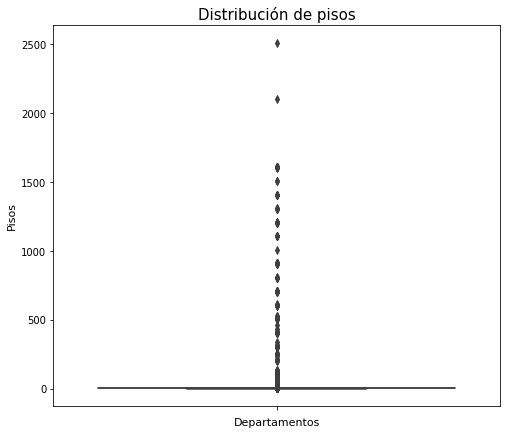

In [54]:
maskNotNull_Floor = data['floor_clean'].notnull()
f, ax = plt.subplots()
f.set_figwidth(8)
f.set_figheight(7)
sns.boxplot(y=data.loc[maskNotNull_Floor,'floor_clean'])
plt.title("Distribución de pisos",fontsize=15)
plt.xlabel("Departamentos",fontsize=11)
plt.ylabel("Pisos",fontsize=11)

Análisis de outliers. Se consideran nulos a los pisos superiores a 20.

In [55]:
maskOutliers = data['floor_clean'] > 20
maskOutliers.value_counts()

False    119792
True       1428
Name: floor_clean, dtype: int64

Se reemplaza los outliers por nulos

In [56]:
maskOutliers = data['floor_clean'] > 20
data.loc[maskOutliers,'floor_clean'] = np.NaN

Visualización sin outliers

Text(0, 0.5, 'Pisos')

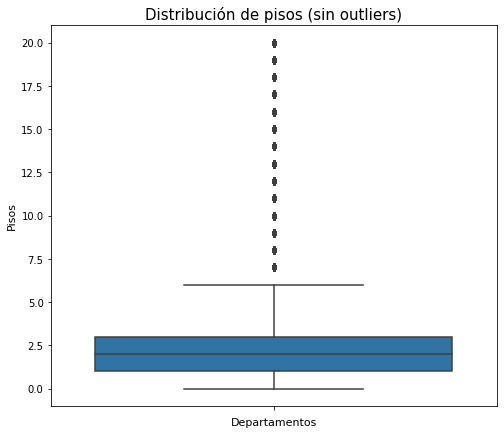

In [57]:
f, ax = plt.subplots()
f.set_figwidth(8)
f.set_figheight(7)
sns.boxplot(y=data['floor_clean'])
plt.title("Distribución de pisos (sin outliers)",fontsize=15)
plt.xlabel("Departamentos",fontsize=11)
plt.ylabel("Pisos",fontsize=11)

---
<b><a id='section_2_6'>2.6. Columnas 'surface_total_in_m2' y 'surface_covered_in_m2'</a> </b>

In [58]:
data['surface_total_in_m2_clean'] = data['surface_total_in_m2']

Análisis de nulos y valores

In [59]:
data_describe.loc[data_describe.index.isin(['surface_covered_in_m2','surface_total_in_m2']),:]

,type,Porcentaje de nulos,Nulos,Valores distintos,Ejemplos
surface_total_in_m2,float64,0.32,39328,1688,"[55.0, nan, 35.0, 53.0, 106.0, 45.0, 65.0, 151..."
surface_covered_in_m2,float64,0.16,19907,996,"[40.0, nan, 55.0, 35.0, 78.0, 60.0, 36.0, 30.0..."


In [60]:
maskNull_coveredAndTotal = data['surface_covered_in_m2'].isnull() & data['surface_total_in_m2'].isnull()
print("Cantidad de nulos que coinciden:",maskNull_coveredAndTotal.value_counts()[True])

Cantidad de nulos que coinciden: 12369


Se opta por completar la columna 'surface_total_in_m2' mediante el siguiente proceso:  
1- Imputar datos de acuerdo a la proporción media entre  'surface_covered_in_m2'  y 'surface_total_in_m2'  
2- Completamos los nulos restantes con datos extraidos de la columna 'descripcion' y 'title'

In [61]:
maskNotNull_TotalAndCovered = data['surface_covered_in_m2'].notnull() & data['surface_total_in_m2'].notnull()
data['covered_pct'] = data.loc[maskNotNull_TotalAndCovered, 'surface_covered_in_m2'] / data.loc[maskNotNull_TotalAndCovered, 'surface_total_in_m2'] 
data['covered_pct'] = data['covered_pct'].apply(lambda x: 1 if x>1 else x)
meanByProperty = pd.DataFrame(data.groupby('property_type')['covered_pct'].mean())
meanByProperty.columns = ['covered_pct_mean']
print("Las casas son las que menos metros cuadrados tienen cubierto")
meanByProperty.sort_values(by = 'covered_pct_mean', ascending=False)

Las casas son las que menos metros cuadrados tienen cubierto


,covered_pct_mean
property_type,
store,0.938940
apartment,0.887711
PH,0.811623
house,0.693948


In [62]:
data = data.merge(meanByProperty, on='property_type')

In [63]:
maskFill = data['surface_covered_in_m2'].notnull() & data['surface_total_in_m2'].isnull()
surface_total_parche = data.loc[maskFill,'surface_covered_in_m2'] / data.loc[maskFill,'covered_pct_mean']
data.loc[maskFill, 'surface_total_in_m2_clean'] = surface_total_parche[maskFill] 

In [64]:
print("Columna 'surface_total_in_m2'")
print("Cantidad de nulos antes de la imputación:", data['surface_total_in_m2'].isnull().sum(), "("+str(round((data['surface_total_in_m2'].isnull().sum()/data.shape[0])*100,1))+"%)")
print("Cantidad de nulos después de la imputación:", data['surface_total_in_m2_clean'].isnull().sum(),"("+str(round((data['surface_total_in_m2_clean'].isnull().sum()/data.shape[0])*100,1))+"%)")

Columna 'surface_total_in_m2'
Cantidad de nulos antes de la imputación: 39328 (32.4%)
Cantidad de nulos después de la imputación: 12369 (10.2%)


In [65]:
#Pattern
regexSurface = re.compile('(?P<mts2>\d\d?\d?\d?)\s?(?P<metros>mts|mt|metros|mt2|m2|m|mts2|m2c|mÂ²|mts²)')

#Regex en la columna 'descripcion'
MatchsSurface = data['description_lower'].apply(lambda x: x if x is np.NaN else regexSurface.search(x))
maskSurface_NullsAndMatch = data['surface_total_in_m2_clean'].isnull() & MatchsSurface.notnull()
data.loc[maskSurface_NullsAndMatch, 'surface_total_in_m2_clean'] = MatchsSurface[maskSurface_NullsAndMatch].apply(lambda x: float(x.group("mts2")))

#Regex en la columna 'title'
MatchsSurface = data['title_lower'].apply(lambda x: x if x is np.NaN else regexSurface.search(x))
maskSurface_NullsAndMatch = data['surface_total_in_m2_clean'].isnull() & MatchsSurface.notnull()
data.loc[maskSurface_NullsAndMatch, 'surface_total_in_m2_clean'] = MatchsSurface[maskSurface_NullsAndMatch].apply(lambda x: float(x.group("mts2")))

Se considera que una propiedad no puede tener menos de 20 mts cuadrados

In [66]:
data['surface_total_in_m2_clean'] = data['surface_total_in_m2_clean'].apply(lambda x: np.NaN if x < 20 else x)

In [67]:
print("Columna 'surface_total_in_m2'")
print("Cantidad de nulos antes del regex:", data['surface_total_in_m2'].isnull().sum(), "("+str(round((data['surface_total_in_m2'].isnull().sum()/data.shape[0])*100,1))+"%)")
print("Cantidad de nulos después del regex:", data['surface_total_in_m2_clean'].isnull().sum(),"("+str(round((data['surface_total_in_m2_clean'].isnull().sum()/data.shape[0])*100,1))+"%)")

Columna 'surface_total_in_m2'
Cantidad de nulos antes del regex: 39328 (32.4%)
Cantidad de nulos después del regex: 9829 (8.1%)


Visualización

Text(0, 0.5, 'Metros cuadrados')

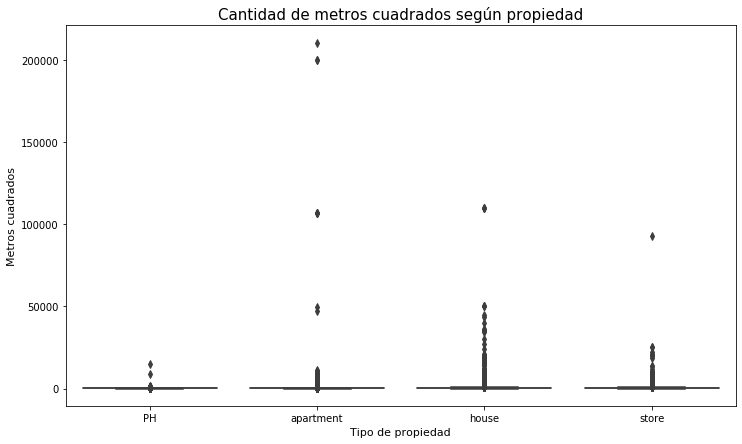

In [68]:
maskNotNull_Surface = data['surface_total_in_m2_clean'].notnull()
f, ax = plt.subplots()
f.set_figwidth(12)
f.set_figheight(7)
sns.boxplot(x=data.loc[maskNotNull_Rooms,'property_type'],y=data.loc[maskNotNull_Rooms,'surface_total_in_m2_clean'])
plt.title("Cantidad de metros cuadrados según propiedad",fontsize=15)
plt.xlabel("Tipo de propiedad",fontsize=11)
plt.ylabel("Metros cuadrados",fontsize=11)

Análisis de outliers.  

In [69]:
data['outliers_Surface'] = None
for i in data['property_type'].unique():
    rangoInterquartil_Surface= data.loc[data['property_type']==i,'surface_total_in_m2_clean'].quantile(0.75) - data.loc[data['property_type']==i,'surface_total_in_m2_clean'].quantile(0.25)
    umbral_lower_Surface = data.loc[data['property_type']==i,'surface_total_in_m2_clean'].quantile(0.25) - rangoInterquartil_Surface*1.5
    umbral_upper_Surface = data.loc[data['property_type']==i,'surface_total_in_m2_clean'].quantile(0.75) + rangoInterquartil_Surface*1.5


    data.loc[maskNotNull_Surface & (data['property_type']==i), 'outliers_Surface']= data.loc[maskNotNull_Surface & (data['property_type']==i), 'surface_total_in_m2_clean'].apply\
                                                                                    (lambda x: "Outlier superior" if x >umbral_upper_Surface else(
                                                                                 "Outlier inferior" if x<umbral_lower_Surface else 
                                                                                 "No es outlier"))

outliers_Surface = data['outliers_Surface']
data = data.drop(columns = ['outliers_Surface'])
pd.DataFrame(round((outliers_Surface.value_counts() / outliers_Surface[maskNotNull_Surface].shape[0])*100,1))

,outliers_Surface
No es outlier,92.1
Outlier superior,7.9


Se reemplaza a los outliers por nulos

In [70]:
maskOutliers= outliers_Surface !="No es outlier"
data.loc[maskOutliers,'surface_total_in_m2_clean'] = np.NaN

Visualización sin outliers

Text(0, 0.5, 'Metros cuadrados')

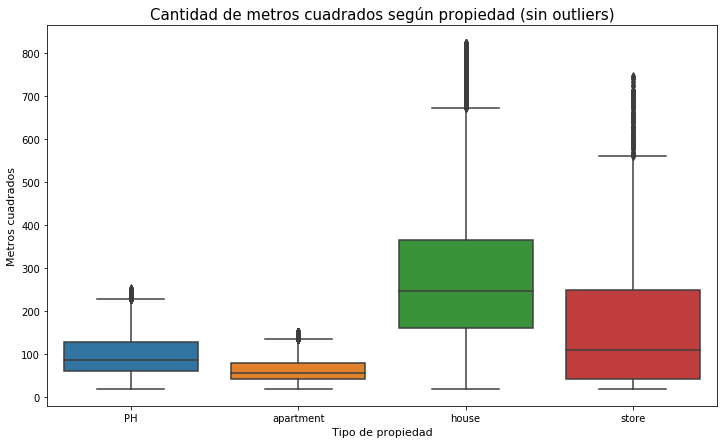

In [71]:
f, ax = plt.subplots()
f.set_figwidth(12)
f.set_figheight(7)

sns.boxplot(x=data['property_type'],y=data['surface_total_in_m2_clean'])
plt.title("Cantidad de metros cuadrados según propiedad (sin outliers)",fontsize=15)
plt.xlabel("Tipo de propiedad",fontsize=11)
plt.ylabel("Metros cuadrados",fontsize=11)

---
<b><a id='section_2_7'>2.7. Columna 'price_usd_per_m2'</a> </b>

Análisis de nulos y valores

In [72]:
data_describe.loc[data_describe.index.isin(['price_usd_per_m2']),:]

,type,Porcentaje de nulos,Nulos,Valores distintos,Ejemplos
price_usd_per_m2,float64,0.43,52603,25568,"[1127.2727272727273, nan, 1309.090909090909, 1..."


Se reemplaza la columna 'price_usd_per_m2' por el cociente de las columnas 'price_aprox_usd_clean' y 'surface_total_in_m2_clean' para que sea consistente con los cambios realizados

In [73]:
maskNotNull = data['price_aprox_usd_clean'].notnull() & data['surface_total_in_m2_clean'].notnull()
data['price_usd_per_m2_clean'] = (data.loc[maskNotNull, 'price_aprox_usd_clean'] / data.loc[maskNotNull, 'surface_total_in_m2_clean']).round(0)

Visualización

Text(0, 0.5, 'Precio por metro cuadrado')

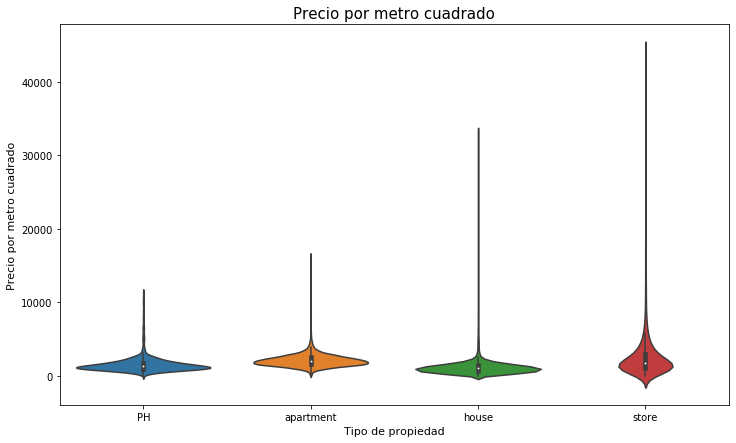

In [74]:
f, ax = plt.subplots()
f.set_figwidth(12)
f.set_figheight(7)
sns.violinplot(data['property_type'], data['price_usd_per_m2_clean'])
plt.title("Precio por metro cuadrado",fontsize=15)
plt.xlabel("Tipo de propiedad",fontsize=11)
plt.ylabel("Precio por metro cuadrado",fontsize=11)

Análisis de outliers

In [75]:
maskNotNull_pricexmt2 = data['price_usd_per_m2_clean'].notnull()
data['outliers_pricexmt2'] = None
for i in data['property_type'].unique():
    rangoInterquartil_pricexmt2= data.loc[data['property_type']==i,'price_usd_per_m2_clean'].quantile(0.75) - data.loc[data['property_type']==i,'price_usd_per_m2_clean'].quantile(0.25)
    umbral_lower_pricexmt2 = data.loc[data['property_type']==i,'price_usd_per_m2_clean'].quantile(0.25) - rangoInterquartil_pricexmt2*1.5
    umbral_upper_pricexmt2 = data.loc[data['property_type']==i,'price_usd_per_m2_clean'].quantile(0.75) + rangoInterquartil_pricexmt2*1.5


    data.loc[maskNotNull_pricexmt2 & (data['property_type']==i), 'outliers_pricexmt2']= data.loc[maskNotNull_pricexmt2 & (data['property_type']==i), 'price_usd_per_m2_clean'].apply\
                                                                                    (lambda x: "Outlier superior" if x >umbral_upper_pricexmt2 else(
                                                                                 "Outlier inferior" if x<umbral_lower_pricexmt2 else 
                                                                                 "No es outlier"))

outliers_pricexmt2 = data['outliers_pricexmt2']
data = data.drop(columns = ['outliers_pricexmt2'])
pd.DataFrame(round((outliers_pricexmt2.value_counts() / outliers_pricexmt2[maskNotNull_pricexmt2].shape[0])*100,1))

,outliers_pricexmt2
No es outlier,96.5
Outlier superior,3.4
Outlier inferior,0.1


Se reemplaza a los outliers por nulos

--------------
## Comentario
Está perfecto la forma en la que eliminan outliers. Les recomendaría hacer una **función** que lo haga, así no tienen que repetir el mismo código tantas veces.

```python
def outliers_cleaning(dataframe, target_column, category_column=None):
    dataf = dataframe.copy()
    mask_notnull = dataf[target_column].notnull()
    
    for category in dataf[category_column].unique():
        mask_category = dataf[category_column] == category
        
        iq_range = dataf.loc[mask_category, target_column].quantile(0.75) - \
                   dataf.loc[mask_category, target_column].quantile(0.25)
        
        lower_range = dataf.loc[mask_category, target_column].quantile(0.25) - iq_range * 1.5
        upper_range = dataf.loc[mask_category, target_column].quantile(0.75) + iq_range * 1.5

        
        dataf.loc[(mask_notnull & mask_category), 'outliers'] = data.loc[(mask_notnull & mask_category), target_category]\
                                                                    .apply(lambda x: "Outlier superior" if x > upper_range \
                                                                                      else ( "Outlier inferior" if x < lower_range \
                                                                                          else "No es outlier"))

    outliers = data['outliers']
    dataf = dataf.drop(columns = ['outliers'])
    summary = pd.DataFrame(round((outliers.value_counts() / outliers[mask_notnull].shape[0])*100,1))
    display(summary)
    
    return dataf
```

#### Lo mismo va para los gráficos
--------------



In [76]:
maskOutliers= outliers_pricexmt2 !="No es outlier"
data.loc[maskOutliers,'price_usd_per_m2_clean'] = np.NaN

Visualización sin outliers

Text(0, 0.5, 'Precio por metro cuadrado')

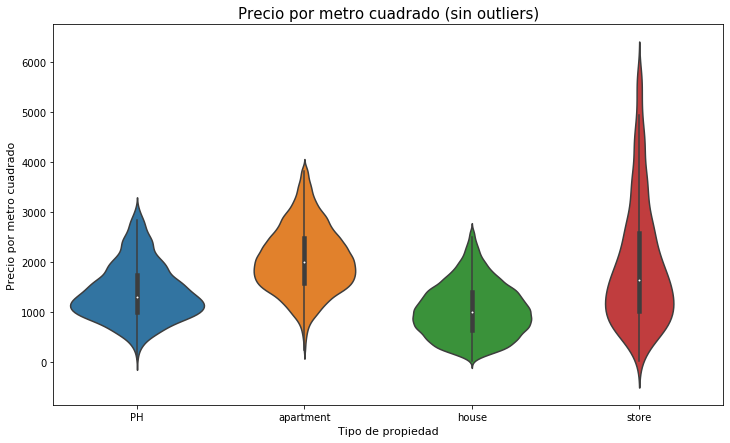

In [77]:
f, ax = plt.subplots()
f.set_figwidth(12)
f.set_figheight(7)
sns.violinplot(data['property_type'], data['price_usd_per_m2_clean'])
plt.title("Precio por metro cuadrado (sin outliers)",fontsize=15)
plt.xlabel("Tipo de propiedad",fontsize=11)
plt.ylabel("Precio por metro cuadrado",fontsize=11)

---
---

<b><a id='section_3'><h4>3. Nuevas variables</h4></a></b>
<a href='#section_3_1'>3.1. Pileta</a>  
<a href='#section_3_2'>3.2. Cochera  </a>  
<a href='#section_3_3'>3.3. Barrio cerrado</a>

Definimos una función para graficar los patrones encontrados

In [78]:
data['decil'] = pd.qcut(data['price_aprox_usd_clean'],10,labels=[1,2,3,4,5,6,7,8,9,10])
def chart_type(y_value):
    chart_pattern = pd.DataFrame(data[y_value].value_counts())
    chart_pattern[y_value+" (%)"] = round(pd.DataFrame(data[y_value].value_counts())/data[y_value].shape[0]*100,2)
    
    chart_property = (data.groupby('property_type')[y_value].sum()/data.groupby('property_type')[y_value].count())*100
    chart_property = pd.DataFrame(round(chart_property,2))
    chart_property =chart_property.reset_index()
    
    chart_decil = (data.groupby('decil')[y_value].sum()/data.groupby('decil')[y_value].count())*100
    chart_decil = pd.DataFrame(round(chart_decil,2))
    chart_decil =chart_decil.reset_index()
    
    f, (ax1, ax2, ax3) = plt.subplots(1, 3)
    f.set_figwidth(12)
    f.set_figheight(4.5)
    
    ax1.pie(chart_pattern[y_value],labels=chart_pattern.index, autopct='%1.1f%%', shadow=True)  
    sns.barplot(x='property_type', y=y_value, data=chart_property, ax=ax2)
    sns.barplot(x='decil', y=y_value, data=chart_decil, color = "#009966", ax=ax3)
    
    plt.tight_layout()
    ax1.title.set_text("Patrones de \'"+y_value+"\' encontrados")
    ax2.title.set_text("Porcentaje de "+y_value+" por tipo de propiedad")
    ax3.title.set_text("Porcentaje de "+y_value+" según decil\ndel valor de la propiedad")
    return

--------------
## Comentario
Muy bien por hacer una función para los gráficos, específicamente para unos tan complejos. Recomiendo permitir pasar más argumentos a la función, por si quieren darle otro uso.

--------------

---
<b><a id='section_3_1'>3.1. Pileta</a>  </b>

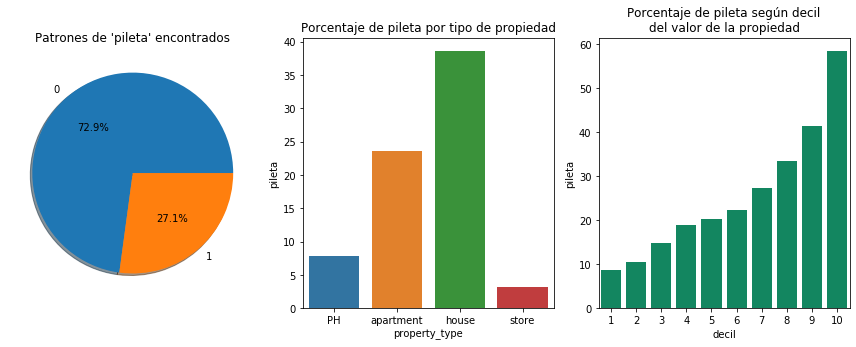

In [79]:
#Pattern
regexPileta = re.compile("(?P<pileta>pileta|picina|piscina|pisina)")

data['pileta'] = 0
#Regex en la columna 'descripcion'
MatchsPileta = data['description_lower'].apply(lambda x: x if x is np.NaN else regexPileta.search(x))
maskPileta_Match = MatchsPileta.notnull()
data.loc[maskPileta_Match, 'pileta'] = 1

#Regex en la columna 'title'
MatchsPileta = data['title_lower'].apply(lambda x: x if x is np.NaN else regexPileta.search(x))
maskPileta_Match = MatchsPileta.notnull()
data.loc[maskPileta_Match, 'pileta'] = 1

chart_type('pileta')

---
<b><a id='section_3_2'>3.2. Cochera</a>  </b>

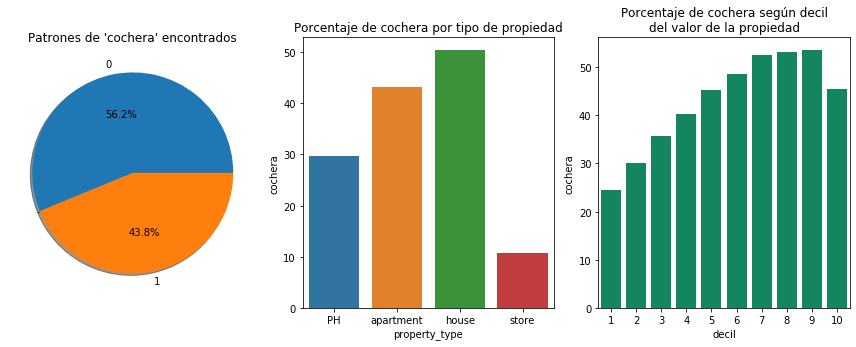

In [80]:
#Pattern
regexCochera = re.compile("(?P<cochera>cochera|garage|auto\s|automovil|vehiculo|\scoche\s|\scoches\s)")

data['cochera'] = 0
#Regex en la columna 'descripcion'
MatchsCochera = data['description_lower'].apply(lambda x: x if x is np.NaN else regexCochera.search(x))
maskCochera_Match = MatchsCochera.notnull()
data.loc[maskCochera_Match, 'cochera'] = 1

#Regex en la columna 'title'
MatchsCochera = data['title_lower'].apply(lambda x: x if x is np.NaN else regexCochera.search(x))
maskCochera_Match = MatchsCochera.notnull()
data.loc[maskCochera_Match, 'cochera'] = 1

chart_type('cochera')

---
<b><a id='section_3_3'>3.3. Barrio cerrado</a>  </b>

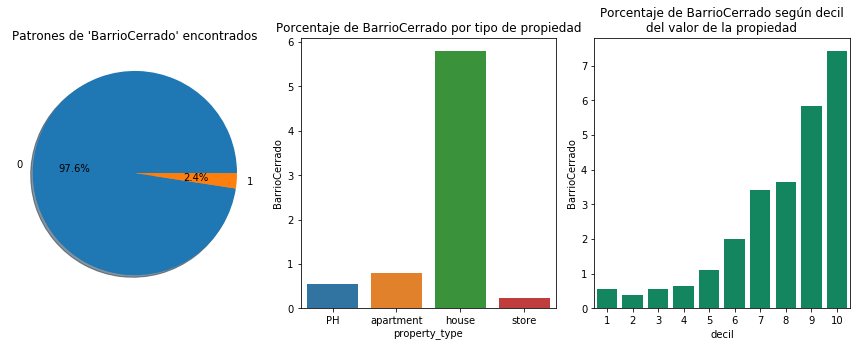

In [81]:
#Pattern
regexBarrioCerrado = re.compile("(?P<barrio>(barrio cerrado)|(barrio semicerrado)|(barrio semi cerrado)|country)")

data['BarrioCerrado'] = 0
#Regex en la columna 'descripcion'
MatchsBarrioCerrado = data['description_lower'].apply(lambda x: x if x is np.NaN else regexBarrioCerrado.search(x))
maskBarrioCerrado_Match = MatchsBarrioCerrado.notnull()
data.loc[maskBarrioCerrado_Match, 'BarrioCerrado'] = 1

#Regex en la columna 'title'
MatchsBarrioCerrado = data['title_lower'].apply(lambda x: x if x is np.NaN else regexBarrioCerrado.search(x))
maskBarrioCerrado_Match = MatchsBarrioCerrado.notnull()
data.loc[maskBarrioCerrado_Match, 'BarrioCerrado'] = 1

chart_type('BarrioCerrado')

---
<b><a id='section_3_9'>3.9. Seguridad</a>  </b>

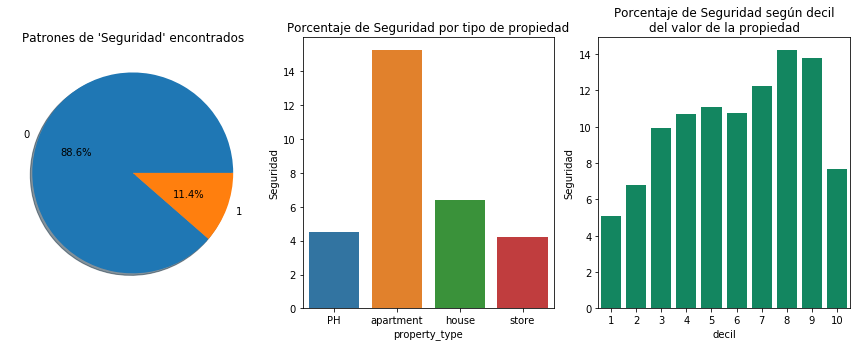

In [84]:
#Pattern
regexSeguridad = re.compile("(?P<seguridad>seguridad|vigilancia|c[a|á]maras|ojo de halc[o|ó]n|vigilador|garita|circuito cerrado|cctv|monitoreo|seg 24|24hr)+")

data['Seguridad'] = 0
#Regex en la columna 'descripcion'
MatchsSeguridad = data['description_lower'].apply(lambda x: x if x is np.NaN else regexSeguridad.search(x))
maskSeguridad_Match = MatchsSeguridad.notnull()
data.loc[maskSeguridad_Match, 'Seguridad'] = 1

#Regex en la columna 'title'
MatchsSeguridad = data['title_lower'].apply(lambda x: x if x is np.NaN else regexSeguridad.search(x))
maskSeguridad_Match = MatchsSeguridad.notnull()
data.loc[maskSeguridad_Match, 'Seguridad'] = 1

chart_type('Seguridad')

---
<b><a id='section_3_10'>3.10. A Reciclar</a>  </b>

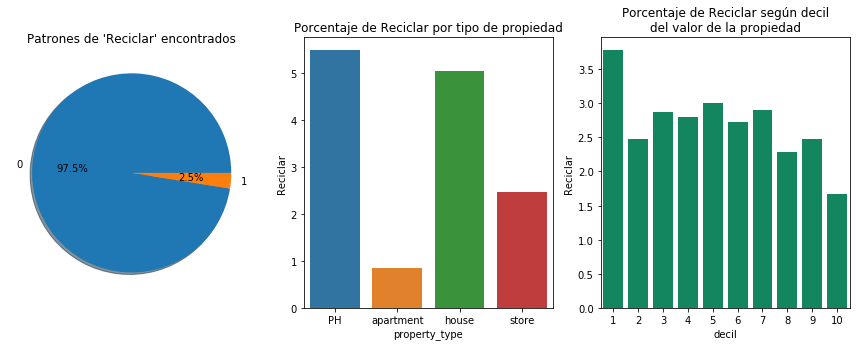

In [85]:
#Pattern
regexReciclar = re.compile("(?P<reciclar>reciclar|refaccionar|acondicionar|a terminar|para terminar)+")

data['Reciclar'] = 0
#Regex en la columna 'descripcion'
MatchsReciclar = data['description_lower'].apply(lambda x: x if x is np.NaN else regexReciclar.search(x))
maskReciclar_Match = MatchsReciclar.notnull()
data.loc[maskReciclar_Match, 'Reciclar'] = 1

#Regex en la columna 'title'
MatchsReciclar = data['title_lower'].apply(lambda x: x if x is np.NaN else regexReciclar.search(x))
maskReciclar_Match = MatchsReciclar.notnull()
data.loc[maskReciclar_Match, 'Reciclar'] = 1

chart_type('Reciclar')

---
<b><a id='section_3_11'>3.11. De Epoca</a>  </b>

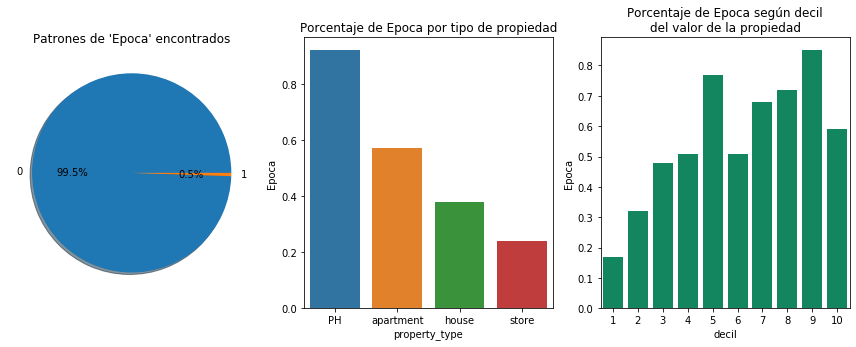

In [86]:
#Pattern
regexEpoca = re.compile("(?P<epoca>de [é|e]poca)+")

data['Epoca'] = 0
#Regex en la columna 'descripcion'
MatchsEpoca = data['description_lower'].apply(lambda x: x if x is np.NaN else regexEpoca.search(x))
maskEpoca_Match = MatchsEpoca.notnull()
data.loc[maskEpoca_Match, 'Epoca'] = 1

#Regex en la columna 'title'
MatchsEpoca = data['title_lower'].apply(lambda x: x if x is np.NaN else regexEpoca.search(x))
maskEpoca_Match = MatchsEpoca.notnull()
data.loc[maskEpoca_Match, 'Epoca'] = 1

chart_type('Epoca')

---
<b><a id='section_3_12'>3.12. Parque, Patio, Jardin</a>  </b>

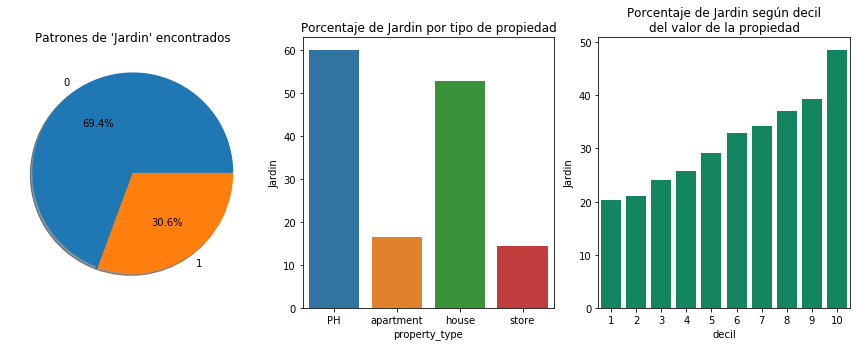

In [88]:
#Pattern
regexJardin = re.compile("(?P<parque>con parque|al parque|jard[i|í]n|patio)+")

data['Jardin'] = 0
#Regex en la columna 'descripcion'
MatchsJardin = data['description_lower'].apply(lambda x: x if x is np.NaN else regexJardin.search(x))
maskJardin_Match = MatchsJardin.notnull()
data.loc[maskJardin_Match, 'Jardin'] = 1

#Regex en la columna 'title'
MatchsJardin = data['title_lower'].apply(lambda x: x if x is np.NaN else regexJardin.search(x))
maskJardin_Match = MatchsJardin.notnull()
data.loc[maskJardin_Match, 'Jardin'] = 1

chart_type('Jardin')

---
---
<b><a id='section_4'><h4>4. Dataset final</h4></a></b>

Se construye un dataset con las variables que serán utilizadas en el modelo

In [89]:
data_final = data[['property_type','provincia','ciudad','departamento','barrio',
                   'price_aprox_usd_clean','surface_total_in_m2_clean','price_usd_per_m2_clean','rooms_clean',
                  'pileta','cochera','BarrioCerrado','Seguridad', 'Reciclar', 'Epoca', 'Jardin']]

Se conserva únicamente las observaciones donde el <u>precio por metro cuadrado no es nulo</u>, ya que esta será la variable a estimar en el modelo

In [90]:
mask = data['price_usd_per_m2_clean'].notnull()
data_final = data_final.loc[mask,:]

In [91]:
data_describe_final = pd.DataFrame(round(data_final.isnull().sum() /data_final.shape[0],2), columns= ['Porcentaje de nulos'])
data_describe_final['type'] = data_final.dtypes
data_describe_final = data_describe_final[['type','Porcentaje de nulos']]
values= []
example=[]
for x in data_final:
    values.append(len(data_final[x].unique()))
    example.append(data_final[x].unique())
data_describe_final['Valores distintos'] = values
data_describe_final['Ejemplos'] = example

print("El dataset que se utilizará para realizar el modelo tiene",data_final.shape[0]," observaciones.")
data_describe_final

El dataset que se utilizará para realizar el modelo tiene 79511  observaciones.


,type,Porcentaje de nulos,Valores distintos,Ejemplos
property_type,object,0.00,4,"[PH, apartment, house, store]"
provincia,object,0.00,28,"[Capital Federal, Bs.As. G.B.A. Zona Norte, Bs..."
ciudad,object,0.03,409,"[Mataderos, Vicente López, Pilar, Mar del Plat..."
departamento,object,0.64,515,"[None, Munro, Pilar, Quilmes, Ramos Mejía, San..."
barrio,object,0.99,17,"[None, Enyoi, QBay Yacht, Islas del Canal, Bar..."
price_aprox_usd_clean,float64,0.00,8238,"[62000.0, 130000.0, 239000.0, 169000.0, 165000..."
surface_total_in_m2_clean,float64,0.00,1644,"[55.0, 106.0, 140.0, 172.0, 117.04945629183474..."
price_usd_per_m2_clean,float64,0.00,3913,"[1127.0, 1226.0, 1707.0, 983.0, 1179.0, 657.0,..."
rooms_clean,float64,0.12,8,"[2.0, 3.0, 4.0, nan, 5.0, 1.0, 6.0, 7.0]"
pileta,int64,0.00,2,"[0, 1]"
